EDA

In [27]:
import pandas as pd
import seaborn as sns

In [29]:
df = pd.read_csv(r"C:\Users\absh8\Desktop\Jupyter Notebooks\5-Days-Live-EDA-and-Feature-Engineering-main\zomato.csv",encoding='latin-1')

In [18]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


1.Missing Values
2.Explore numerical variables and Categorical Variables
3.Find relationships between features

In [24]:
missing_values_features = [features for features in df.columns if df[features].isnull().sum() > 0]

In [25]:
missing_values_features

['Cuisines']

In [30]:
df_cn = pd.read_excel(r"C:\Users\absh8\Desktop\Jupyter Notebooks\5-Days-Live-EDA-and-Feature-Engineering-main\Country-Code.xlsx")

In [31]:
df_new = pd.merge(df,df_cn,on='Country Code',how='left')

In [32]:
df_new.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [33]:
df_new.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
country_values = df_new.Country.value_counts().values
country_names = df_new.Country.value_counts().index

([<matplotlib.patches.Wedge at 0x1c512face10>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

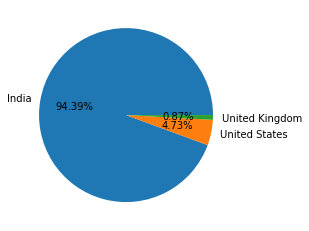

In [43]:
plt.pie(country_values[:3],labels=country_names[:3],autopct="%1.2f%%")

In [45]:
df_new.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [49]:
ratings=df_new.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})

In [50]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [55]:
df_new[df_new['Rating text']=='Excellent'].groupby(['Country']).size().reset_index()

,Country,0
0,Australia,1
1,Brazil,16
2,India,116
3,Indonesia,7
4,New Zealand,12
5,Phillipines,12
6,Qatar,4
7,South Africa,12
8,Sri Lanka,2
9,Turkey,10


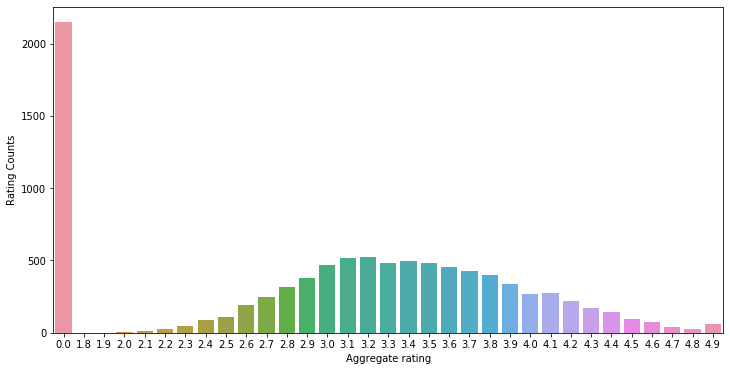

In [61]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x="Aggregate rating",y="Rating Counts",data=ratings)